# P-Values

YT video 1 - https://www.youtube.com/watch?v=vemZtEM63GY

YT video 2 - https://www.youtube.com/watch?v=JQc3yx0-Q9E

### The Problem of Random Chance

When comparing two things, like the effectiveness of Drug A versus Drug B, we can't draw a reliable conclusion from a very small test. Imagine we give Drug A to one person and they are cured, while another person takes Drug B and is not cured. Can we conclude that Dug A is better? Simply put, we **cannot**.

The difference in outcome coul be due to a lot of weird, random things that have nothing to do with the drugs themselves. For example:
* The person who took Drug B might have a rare allergy
* The person who took Drug A might have been cured by the **placebo effect**
* The person taking Drug B might have other health issues or be taking other medications that interfere.

With such a small sample, any result is likely due to **random chance**, and we can't be confident in our conclusion. This means we need to test each drug on more than just one person.

### The P-Value and Quantifying Confidence

The P-value is a number between 0 and 1 that helps us quantify how confident we should be that the difference we see between two groups is real and not just a result of random chance.

Let's redo the experiment, but this time with a lot more people. We test Two different set of results

* **Scenario 1** (Obvious Difference):
  * **Drug A**: 1,043 people were cured, and 3 were not (a 99.7% cure rate).
  * **Drug B**: 2 people were cured, and 1,432 were not (a 0.1% cure rate).
  In this case, the results are so dramatically different that it would seem unrealistic to suppose these results were just random chance. We are very confident that Drug A is better than Drug B. A statistical test on this data would produce a very small **p-value** (close to 0). The difference is real.
* **Scenario 2** (Ambiguous Difference):
  * **Drug A**: 73 people were cured, and 125 were not (a 37% cure rate).
  * **Drug B**: 59 people were cured, and 131 were not (a 31% cure rate).
  Here, Drug A still seems better, but the difference is much smaller. How confident can we be that this 6% difference is real and not just a fluke from this specific group of people? 

  This is where calculating a p-value becomes essential.

We can simulate this "ambiguous" scenario in Python and use a statistical test to find the P-value. The video mentions using Fisher's Exact Test, which is perfect for this kind of "cured" vs. "not cured" data. 

In [1]:
import numpy as np 
from scipy.stats import fisher_exact

# Create a 2x2 table representing the data from Scenario 2
experiment_data = np.array([[73, 125], [59, 131]])

# Perform Fisher's Exact Test
# The test returns two values, but we only need the p-value for now.
odds_ratio, p_value = fisher_exact(experiment_data)

print(f"P-value: {p_value}")

print("\nA p-value is a number between 0 and 1.")
print("The closer the p-value is to 0, the more confident we are that the drugs are truly different.")
print("This relatively large p-value (not close to 0) suggests we can't be very confident that Drug A is superior based on this data.")

P-value: 0.23978206828606125

A p-value is a number between 0 and 1.
The closer the p-value is to 0, the more confident we are that the drugs are truly different.
This relatively large p-value (not close to 0) suggests we can't be very confident that Drug A is superior based on this data.


### Hypothesis Testing and The Threshold

To make a firm decision, we use a pre-defined **threshold** for our p-value, a process known as **Hypothesis Testing**.

* **Hypothesis Testing**: The idea of trying to determine if our two drugs are the same or not.
* **The Null Hypothesis**: This is the default assumption that the drugs are the same. Our goal is to see if we have enough evidence to prove this assumption wrong.
* **The Threshold (alpha level)**: The most common threshold is **0.05**. This means we are willing to accept a 5% risk of being wrong.
If **p-value < 0.05**, we **reject the Null Hypothesis**. We conclude that the drugs are different.
* If **p-value ≥ 0.05**, we **fail to reject the Null Hypothesis**. This doesn't mean the drugs are the same; it just means we don't have enough evidence to say they are different.
* False Positive: Getting a small p-value (e.g., < 0.05) when there is no real difference is called a False Positive. The 0.05 threshold means we accept that 5% of the time, our experiments will result in a False Positive.

In [2]:
from scipy.stats import fisher_exact
import numpy as np

# Data from scenario 2
experiment_data = np.array([[73, 125], [59, 131]])

# Calculate the p-value
odds_ratio, p_value = fisher_exact(experiment_data)

# Set our threshold 
threshold = 0.05

print(f"The Null Hypothesis is that the drugs are the same.")
print(f"Our p-value is {p_value:.2f} and our threshold is {threshold}.")

# Make a decision based on the threshold
if p_value < threshold:
  print("\nResult: We reject the Null Hypothesis. The drugs are likely different.")
else:
  print("\nResult: We fail to reject the Null Hypothesis. We are not confident the drugs are different.")

The Null Hypothesis is that the drugs are the same.
Our p-value is 0.24 and our threshold is 0.05.

Result: We fail to reject the Null Hypothesis. We are not confident the drugs are different.


Since 0.24 is not less than 0.05, we are not confident that Drug A is different from Drug B.


### P-Value Does NOT Measure the Size of the Difference

A small p-value does not imply that the effect size (the actual difference between Drug A and Drug B) is large or meaningful. It only tells us how confident we are that some difference exists. You can have a very small p-value for a very tiny difference, especially if you have a huge number of people in your experiment.

* In our "ambiguous" example, the difference in cure rates was 6% (37% vs 31%) and the p-value was large (0.24).
* However, if we ran a much larger experiment where Drug A cured 5005 people and Drug B cured 4800, the cure rates might be very close (e.g., 34% vs 35%), but because the sample size is huge, the p-value could be very small (e.g., 0.04).

A small p-value just means we are confident the results are not a random fluke. It does not tell us if the difference is big enough to matter in the real world.

In [ ]:
from scipy.stats import fisher_exact
import numpy as np

# New experiment with huge number of people
# Drug A: 5005 Cured, 9868 Not Cured (34% cure rate)
# Drug B: 4800 Cured, 9000 Not Cured (35% cure rate)
big_experiment_data = np.array([[5005, 9868], [4800, 9000]])

odds_ratio, p_value = fisher_exact(big_experiment_data)
threshold = 0.05

print(f"P-value from huge experiment: {p_value:.3f}")

if p_value < threshold:
  print("Result: P-value is smaller than 0.05. We are confident the drugs are different.")
else:
  print("Result: P-value is larger than 0.05. We are not confident the drugs are different.")

print("\nIMPORTANT: Even though the p-value is small, the actual difference in cure rates (34% vs 35%) is tiny")
print("A small p-value does not mean a large effect")

P-value from huge experiment: 0.045
Result: P-value is smaller than 0.05. We are confident the drugs are different.

IMPORTANT: Even though the p-value is small, the actual difference in cure rates (34% vs 35%) is tiny!
A small p-value does not mean a large effect!


This shows that even with a tiny 1% difference, the massive sample size gives us a p-value of 0.04, which is less than 0.05. We are confident the drugs are different, but the difference itself is not very large.


### Calculating Probabilities of All Outcomes

To evaluate if an observation is statistically rare, you must first know the probabilities of all possible outcomes.
* For a fair coin flipped twice, there are 4 equally likely outcomes: HH, HT, TH, TT
* The probability of an event is calculated as:
 * `(Number of ways for the event to happen) / (Total number of outcomes)`
 * **P(2 Heads)** = 1/4 = 0.25
 * **P(2 Heads)** = 1/4 = 0.25
 * **P(1 Head, 1Tail)** = 2/4 = 0.50

 This code stimulates 100,000 double coin flips to empirically demonstrate these probabilities

In [1]:
import random

num_simulations = 100000
outcomes = {"HH": 0, "HT": 0, "TH": 0, "TT": 0}

for _ in range(num_simulations):
    flip1 = random.choice(["H", "T"])
    flip2 = random.choice(["H", "T"])
    outcome = flip1 + flip2
    outcomes[outcome] += 1

# Print the simulated probabilities
print("Probabilities from simulation:")
for outcome, count in outcomes.items():
    print(f"{outcome}: {count / num_simulations:.3f}")  

Probabilities from simulation:
HH: 0.249
HT: 0.247
TH: 0.251
TT: 0.253


### Two sided P-values

The **p-value** is the probability of obtaining your observed result, or something even more extreme, assuming the null hypothesis is true. A standard **two sided p-value** is calculated by summing three components.
* **Probability of the observation itself** (e.g., p(HH) = 0.25)
* **Probability of all other equally rare outcomes** (e.g., P(TT) = 0.25). We include these because multiple rare outcomes make any single one less special
* **Probability of all rarer (more extreme) outcomes** (e.g., P(anything rarer) = 0 in this case)

**Calculation**
* `p-value for 2 Heads = P(HH) + P(TT) + P(rarer) = 0.25 + 0.25 + 0 = 0.5`
* A result is **statistically significant** if its p-value is less than a threshold, typically 0.05.
* Since 0.5 > 0.05, getting 2 heads is NOT statistically significant.

### P-values with Continuous Distribution

For continuous data like height, we can't list all outcomes. Instead, we use a **statistical distribution**, where the p-value is the **area under the curve** for extreme results
* The p-value is the total probability of observing a value as far or farther from the mean as your measurement
* **Example**: For a height distribution with an average of 155.7 cm, what is the p-value for measuring someone who is 142 cm tall?
 * Find the area of all values **les than or equal** to 142cm (e.g., 2.5%)
 * Find the area of all values that are equally extreme on the other side of the average (i.e., greater than or equal to 169 cm). (e.g., 2.5%)
 * Sum these areas: p-value = `0.025 + 0.025 = 0.05`

P-value for a height of 142 cm is: 0.050


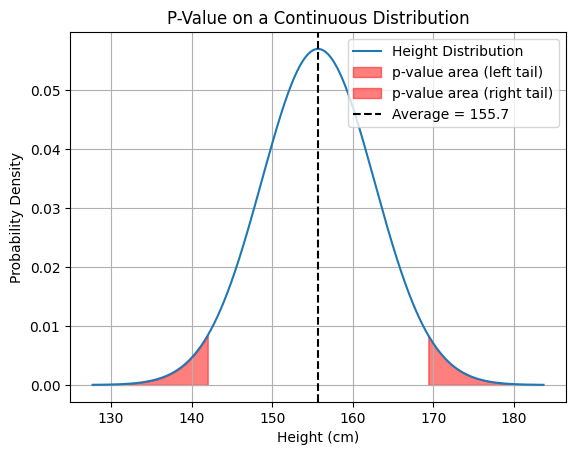

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Distribution's parameters
average_height = 155.7
std_dev = 7 # Standard deviation determines the spread of the curve
observed_height = 142

#  Calculate the probability in the left tail
prob_left_tail = norm.cdf(observed_height, loc=average_height, scale=std_dev)

# Calculate the probability in the equally extreme right tail
equivalent_height_on_right = average_height + (average_height - observed_height)
prob_right_tail = 1 - norm.cdf(equivalent_height_on_right, loc=average_height, scale=std_dev)

# The two-sided p-value is the sum of the tails
p_value = prob_left_tail + prob_right_tail
print(f"P-value for a height of {observed_height} cm is: {p_value:.3f}")

# CURVE CODE
# Create a range of x values (heights) for the plot
x = np.linspace(average_height - 4*std_dev, average_height + 4*std_dev, 1000)
# Calculate the y values (probability density) for the curve
y = norm.pdf(x, loc=average_height, scale=std_dev)

# Plot the main distribution curve
plt.plot(x, y, label='Height Distribution')

# Shade the area for the left tail (more extreme)
x_fill_left = np.linspace(average_height - 4*std_dev, observed_height, 100)
y_fill_left = norm.pdf(x_fill_left, loc=average_height, scale=std_dev)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5, label=f'p-value area (left tail)')

# Shade the area for the right tail (equally extreme)
x_fill_right = np.linspace(equivalent_height_on_right, average_height + 4*std_dev, 100)
y_fill_right = norm.pdf(x_fill_right, loc=average_height, scale=std_dev)
plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.5, label=f'p-value area (right tail)')

# Add labels and title for clarity
plt.title('P-Value on a Continuous Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.axvline(average_height, color='black', linestyle='--', label=f'Average = {average_height}')
plt.legend()
plt.grid(True)
plt.show()

### One Sided P-values 

A **one-sided p-value** is used when you have a strong reason to believe a change can only happen in one specific direction.
*   **How it works:** It only calculates the area in the tail that corresponds to the direction of interest. If a drug is expected to *shorten* recovery time, you only sum the probabilities of recovery times less than or equal to your observation.
*   **The Danger:** This test is "blind" to effects in the opposite direction. If a drug is intended to help but actually *lengthens* recovery time, a one-sided test will fail to detect this significant negative result.
*   **Conclusion:** One-sided p-values can be misleading and should be avoided unless used by experts with a clear, pre-stated justification.